In [3]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [4]:
dirs = {}

dirs['ntuple_wh_100m_test.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'

 


fnames = {}

fname = {
    'ntuple_wh_100m_test.root',

        }


tree = OrderedDict()

for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    tree[file] = root_dir['ntuples/llp']
 
    print ('Open ready')
    print ('Tree ready') 
    print(tree[file], tree)
    v = tree[file]
    llp_d_pid = v['gLLP_daughter_pid'].array()
    print(llp_d_pid[:10])

/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_wh_100m_test.root
Open ready
Tree ready
<TTree b'llp' at 0x7f100a39a390> OrderedDict([('ntuple_wh_100m_test.root', <TTree b'llp' at 0x7f100a39a390>)])
[[1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]
 [1000022      25    -666    -666]]


# ctau

ntuple_wh_100m_test.root <TTree b'llp' at 0x7f9bbbd354e0>
 FCN=117.614 FROM MIGRAD    STATUS=CONVERGED      37 CALLS          38 TOTAL
                     EDM=3.97595e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.32626e+00   4.25609e-02   1.31872e-04  -1.66937e-02
   2  Slope       -1.19006e-04   8.57871e-06   2.65858e-08   2.47534e+01


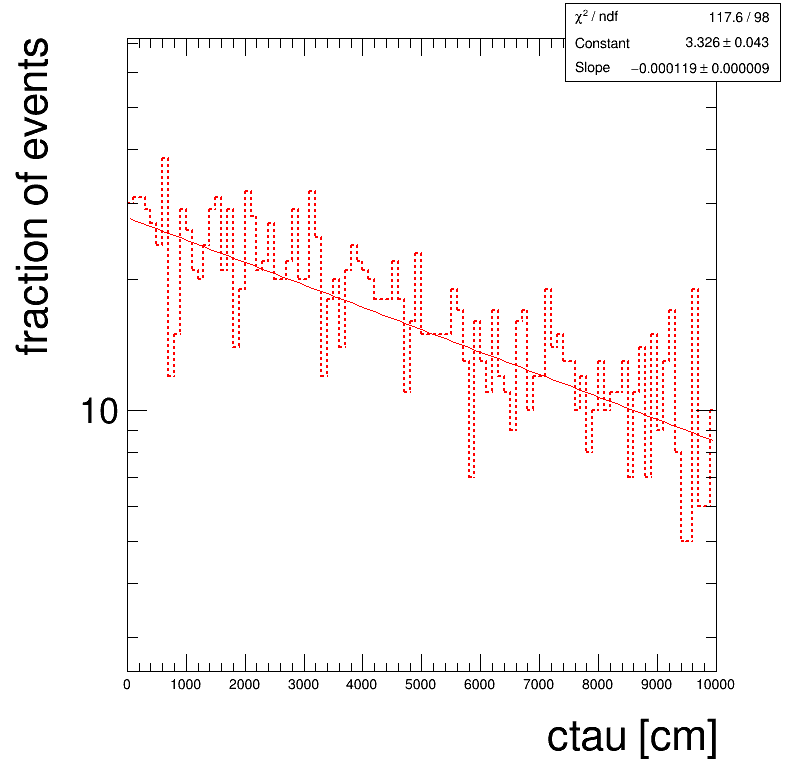

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.23,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}
hy = {}
hz = {}
hct = {}

 

for k,v in tree.items(): 
    print(k,v)
    
 
 
    if 'root' in k:
    
 
        
        beta = v['gLLP_beta'].array()
 
        decay_x = v['gLLP_decay_vertex_x'].array()
        decay_y = v['gLLP_decay_vertex_y'].array()
        decay_z = v['gLLP_decay_vertex_z'].array()

#         h_x_all = decay_x.flatten()
#         h_y_all = decay_y.flatten()
#         h_z_all = decay_z.flatten()
        
#         h_beta_all = beta.flatten()
        h_x_all = decay_x[:,0]
        h_y_all = decay_y[:,0]
        h_z_all = decay_z[:,0]
        
        h_beta_all = beta[:,0]

        h_r_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_x_all, h_y_all)]
        h_d_all = [rt.TMath.Sqrt(pow(x,2)+pow(y,2)) for x,y in zip(h_r_all, h_z_all)]
        
        out_h_ct_flat = [x/y*(rt.TMath.Sqrt(1-pow(y ,2))) for x,y in zip(h_d_all, h_beta_all)]
        
    

        hct[k] = create_TH1D( out_h_ct_flat, axis_title=['ctau [cm]', 'fraction of events'], name="", binning=[100,-0,10000])
        hct[k].SetLineStyle(i+2)
        hct[k].SetLineColor(i+2)
#         hct[k].SetMarkerColor(cols[k])
        hct[k].GetXaxis().SetLabelSize(0.02)

        hct[k].Draw('same')
#         hct[k].DrawNormalized('same')
        hct[k].Fit('expo')
#         hct[k].Fit('expo','','',10,20000)
 

      

#         leg.AddEntry(hct[k], texs[k])
        
 
 
        i += 1
    

# leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
# c.SetLogx()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'decay_ctau_beta.png')

ntuple_wh_100m_test.root <TTree b'llp' at 0x7f100a39a390>
['TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000']
0 18.982828 0.83694243 -3.123229 44.15527
[35.66793253340959]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


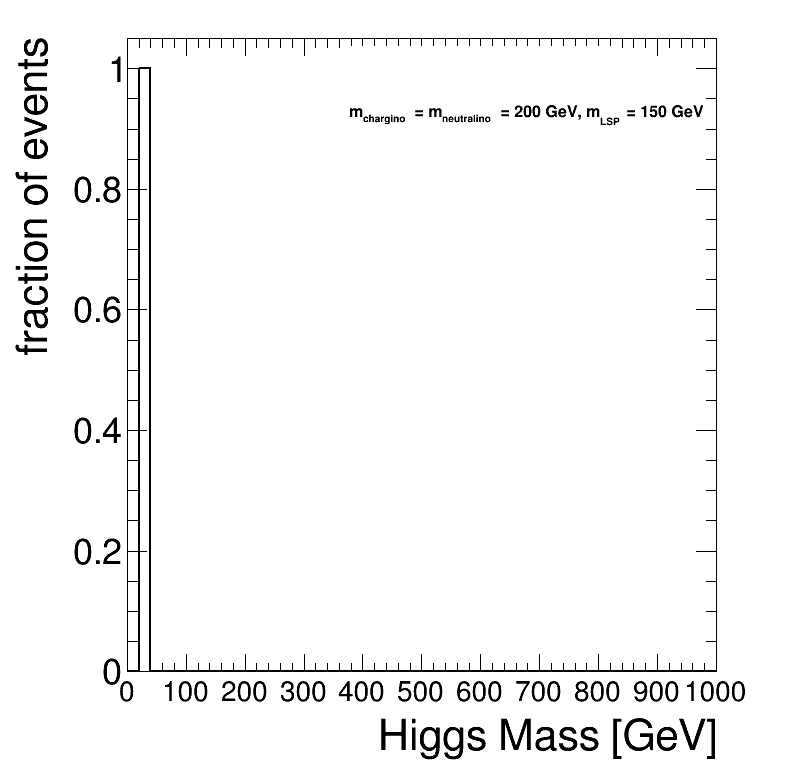

In [11]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    eta = v['gParticleEta'].array()
    phi = v['gParticlePhi'].array()
    e = v['gParticleE'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==25, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'root' in k:
        

        h_pt = pt[basic_str]
        h_eta = eta[basic_str]
        h_phi = phi[basic_str]
        h_e = e[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()
    h_eta_all = h_eta.flatten()
    h_phi_all = h_phi.flatten()
    h_e_all = h_e.flatten()
#     print(0,h_pt[0],h_eta[0],h_phi[0],h_e[0])
#     print(h_pt_all[:10])
#     print(h_eta_all[:10])
#     print(h_phi_all[:10])
#     print(h_e_all[:10])
#     print(len(h_pt_all))

    h_mass_all = []
    
    for index in range(0,len(h_pt_all)):
#         print(i)
        
        tmp_p4_h    = rt.TLorentzVector()
        tmp_p4_h.SetPtEtaPhiE(h_pt_all[index], h_eta_all[index], h_phi_all[index], h_e_all[index])
        print(index,h_pt_all[index],h_eta_all[index],h_phi_all[index],h_e_all[index])

        tmp_mass = tmp_p4_h.M()
        
        h_mass_all.append(tmp_mass)
        
        if i>10:
            break
    
#     h_mass_all = h_mass.flatten()

    print(h_mass_all[:10])

    ht[k] = create_TH1D( h_mass_all, axis_title=['Higgs Mass [GeV]', 'fraction of events'], name="", binning=[50,0,1000])
#     ht[k].SetLineStyle(styles[k])
#     ht[k].SetLineColor(cols[k])
#     ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

#     leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 150 GeV')
leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()

ntuple_wh_100m_test.root <TTree b'llp' at 0x7f100a39a390>
['TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000']
0 42.340168 0.14978625 -0.707196 204.5317
[200.0000026739741]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


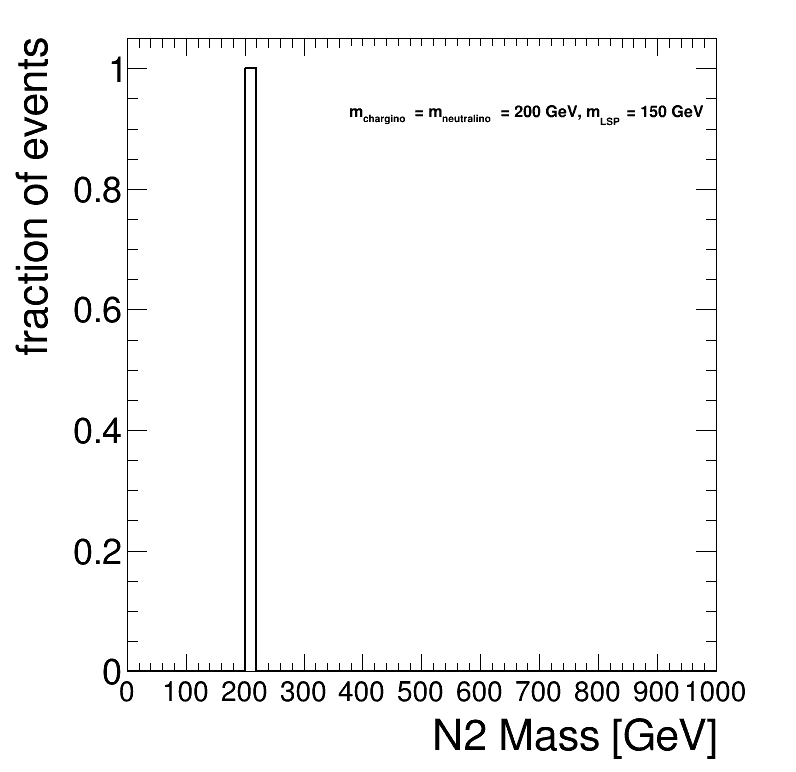

In [9]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    eta = v['gParticleEta'].array()
    phi = v['gParticlePhi'].array()
    e = v['gParticleE'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000023, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'root' in k:
        

        h_pt = pt[basic_str]
        h_eta = eta[basic_str]
        h_phi = phi[basic_str]
        h_e = e[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()
    h_eta_all = h_eta.flatten()
    h_phi_all = h_phi.flatten()
    h_e_all = h_e.flatten()
#     print(0,h_pt[0],h_eta[0],h_phi[0],h_e[0])
#     print(h_pt_all[:10])
#     print(h_eta_all[:10])
#     print(h_phi_all[:10])
#     print(h_e_all[:10])
#     print(len(h_pt_all))

    h_mass_all = []
    
    for index in range(0,len(h_pt_all)):
#         print(i)
        
        tmp_p4_h    = rt.TLorentzVector()
        tmp_p4_h.SetPtEtaPhiE(h_pt_all[index], h_eta_all[index], h_phi_all[index], h_e_all[index])
        print(index,h_pt_all[index],h_eta_all[index],h_phi_all[index],h_e_all[index])

        tmp_mass = tmp_p4_h.M()
        
        h_mass_all.append(tmp_mass)
        
        if i>10:
            break
    
#     h_mass_all = h_mass.flatten()

    print(h_mass_all[:10])

    ht[k] = create_TH1D( h_mass_all, axis_title=['N2 Mass [GeV]', 'fraction of events'], name="", binning=[50,0,1000])
#     ht[k].SetLineStyle(styles[k])
#     ht[k].SetLineColor(cols[k])
#     ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

#     leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 150 GeV')
leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()

ntuple_wh_100m_test.root <TTree b'llp' at 0x7f100a39a390>
['TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000'
 'TChiWH_WToLNu_HToBB_200_150_100000' 'TChiWH_WToLNu_HToBB_200_150_100000']
0 54.976055 -0.18951288 -0.5873177 160.10066
[150.00000320271775]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


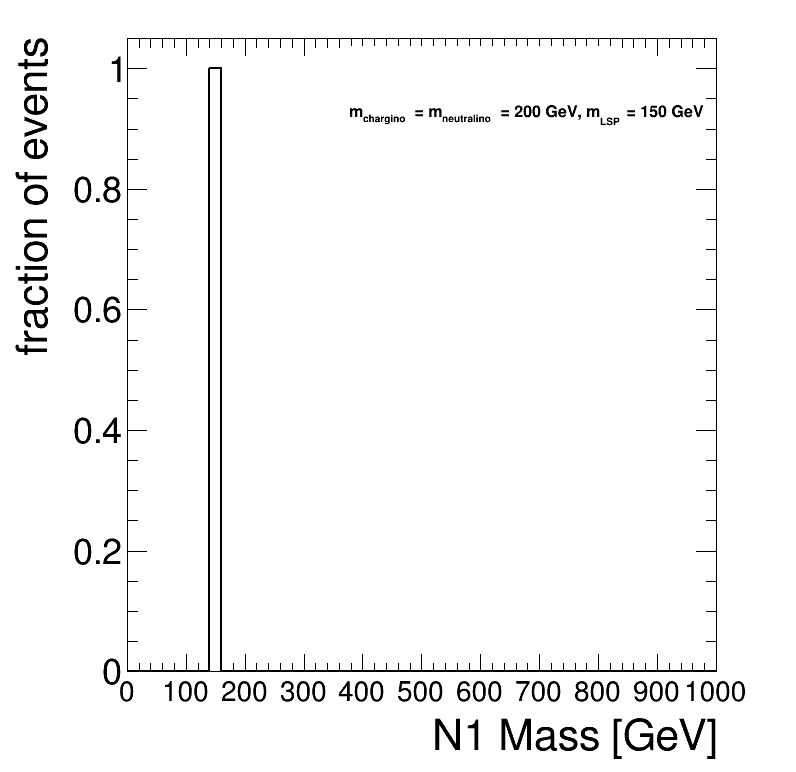

In [13]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    eta = v['gParticleEta'].array()
    phi = v['gParticlePhi'].array()
    e = v['gParticleE'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000023)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'root' in k:
        

        h_pt = pt[basic_str]
        h_eta = eta[basic_str]
        h_phi = phi[basic_str]
        h_e = e[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()
    h_eta_all = h_eta.flatten()
    h_phi_all = h_phi.flatten()
    h_e_all = h_e.flatten()
#     print(0,h_pt[0],h_eta[0],h_phi[0],h_e[0])
#     print(h_pt_all[:10])
#     print(h_eta_all[:10])
#     print(h_phi_all[:10])
#     print(h_e_all[:10])
#     print(len(h_pt_all))

    h_mass_all = []
    
    for index in range(0,len(h_pt_all)):
#         print(i)
        
        tmp_p4_h    = rt.TLorentzVector()
        tmp_p4_h.SetPtEtaPhiE(h_pt_all[index], h_eta_all[index], h_phi_all[index], h_e_all[index])
        print(index,h_pt_all[index],h_eta_all[index],h_phi_all[index],h_e_all[index])

        tmp_mass = tmp_p4_h.M()
        
        h_mass_all.append(tmp_mass)
        
        if i>10:
            break
    
#     h_mass_all = h_mass.flatten()

    print(h_mass_all[:10])

    ht[k] = create_TH1D( h_mass_all, axis_title=['N1 Mass [GeV]', 'fraction of events'], name="", binning=[50,0,1000])
#     ht[k].SetLineStyle(styles[k])
#     ht[k].SetLineColor(cols[k])
#     ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

#     leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 150 GeV')
leg.Draw()

# c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()

ntuple_wh_100m_test.root <TTree b'llp' at 0x7f100a39a390>
[ 8.276984  26.736809  23.437033  25.020031  16.949537  15.666039
  7.0218153 20.962917   9.44973   53.477695 ]
[2.3762856e-01 6.6946763e-01 6.9101524e-01 ... 1.9129144e+02 2.1543689e+02
 2.4403171e+02]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


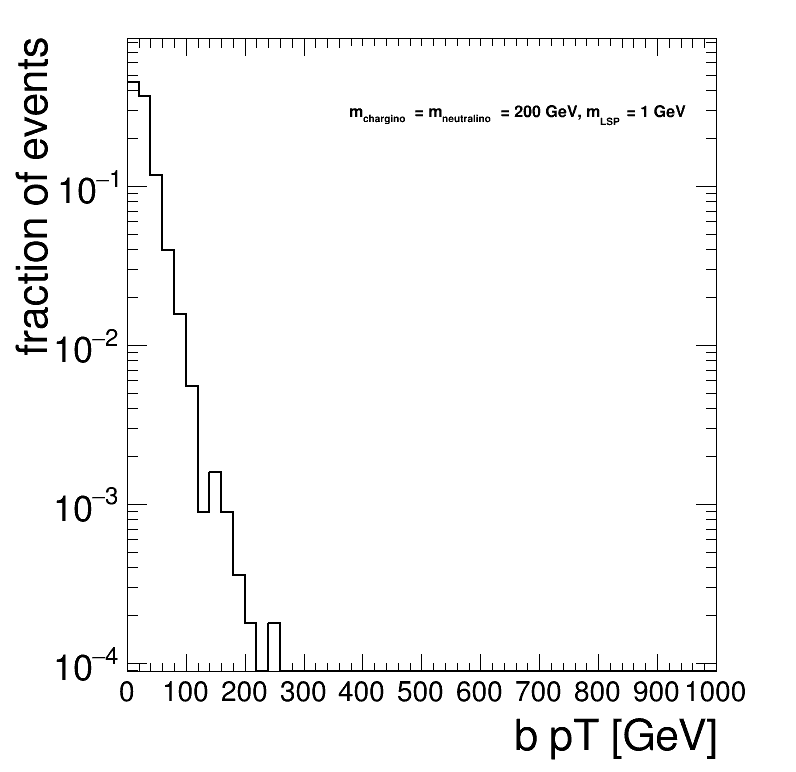

In [15]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(abs(pid)==5, status==23)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

#     print(tags[:10])

    # variables
    
    
 
    if 'root' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['b pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
#     ht[k].SetLineStyle(styles[k])
#     ht[k].SetLineColor(cols[k])
#     ht[k].SetMarkerColor(cols[k])
    ht[k].GetXaxis().SetLabelSize(0.04)

    ht[k].DrawNormalized('same')

#     leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 200 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()